In this notebook, we simulate the Dikin and Vaidya walks for three different cases as elaborated in the Experiments section of the pdf attached.

# Importing The Basic Functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from basics import *
import main_run

In [3]:
def plot_line(A, xx, xlims, ylims): 
    n, d = A.shape
    for i in range(n):
        a = A[i,:]
        plt.plot(xx, (1-a[0]*xx)/a[1], linewidth=1.)
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    axes.grid('on')
    return A

def generate_A_and_b(N, d=2):
    A = np.random.rand(N, d)
    S = np.random.choice([-1., 1.], N) # to make some terms negative (to make the set closed)
    A = A * np.outer(S, np.ones(d))
    b = np.ones(N)

    return A, b

def plot_A_b(A, b, xx, xlims, ylims):
    n, d = A.shape
    thr = n
    if n >  thr:
        idx = np.random.choice(np.arange(0, n), thr)
    else:
        idx = np.arange(0, n)
    for i in idx:
        plt.plot(xx, (b[i]-A[i, 0]*xx)/A[i, 1], linewidth=.2, color='k')
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    axes.grid('on')

def plot_circle(xlims, ylims):
    n, d = A.shape
    circle1 = plt.Circle((0, 0), 1, color='black', linestyle='--', fill=False)
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    axes.grid('on')
    axes.add_artist(circle1)

In [4]:
import matplotlib as mpl
import matplotlib.pylab as pylab

label_size = 60
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size

mpl.rcParams['legend.fontsize'] = 50
pylab.rcParams['xtick.major.pad']=8
pylab.rcParams['ytick.major.pad']=8

fs = 135
s = 60
savfig = True

In [5]:
path = '/Users/raaz.rsk/Box Sync/2017/Martin/vaidya-walk/figures/'

# $[-1, 1]^2$

In [6]:
np.random.seed(695829)
experiments = 1000
iterations = 1001

# Defining the Polytope
d = 2
r = 0.5

repetitions = np.array([0, 4, 9])
num_reps = len(repetitions)

dikin_rvs_p = np.zeros((num_reps, d, experiments, iterations))
vaidya_rvs_p = np.zeros((num_reps, d, experiments, iterations))
for index, rep in enumerate(repetitions):
    print 'repetition = %d ' % rep
    A, b = main_run.define_polytope(d, rep)
    dikin_rvs_p[index,:, :, :] = main_run.run_dikin_walk(experiments, iterations, A, b, r)
    vaidya_rvs_p[index,:, :, :] = main_run.run_vaidya_walk(experiments, iterations, A, b, r)
uniform_rvs = 2*np.random.rand(experiments, d)-1

repetition = 0 
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 100, Time Taken: 0.73
Experiment Number: 200, Time Taken: 0.71
Experiment Number: 300, Time Taken: 0.79
Experiment Number: 400, Time Taken: 0.80
Experiment Number: 500, Time Taken: 0.92
Experiment Number: 600, Time Taken: 0.76
Experiment Number: 700, Time Taken: 0.87
Experiment Number: 800, Time Taken: 0.79
Experiment Number: 900, Time Taken: 0.71
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 100, Time Taken: 1.25
Experiment Number: 200, Time Taken: 1.30
Experiment Number: 300, Time Taken: 1.31
Experiment Number: 400, Time Taken: 1.23
Experiment Number: 500, Time Taken: 1.34
Experiment Number: 600, Time Taken: 1.36
Experiment Number: 700, Time Taken: 1.25
Experiment Number: 800, Time Taken: 1.11
Experiment Number: 900, Time Taken: 1.12
repetition = 4 
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 100, Time Taken: 0.85
Experiment Number: 200, Time Taken: 1.11
Experiment Number: 300, Time Ta

In [ ]:
NUM_PLOT = 200
iter_plot = np.array([10, 100, 500, 1000])
savfig = True

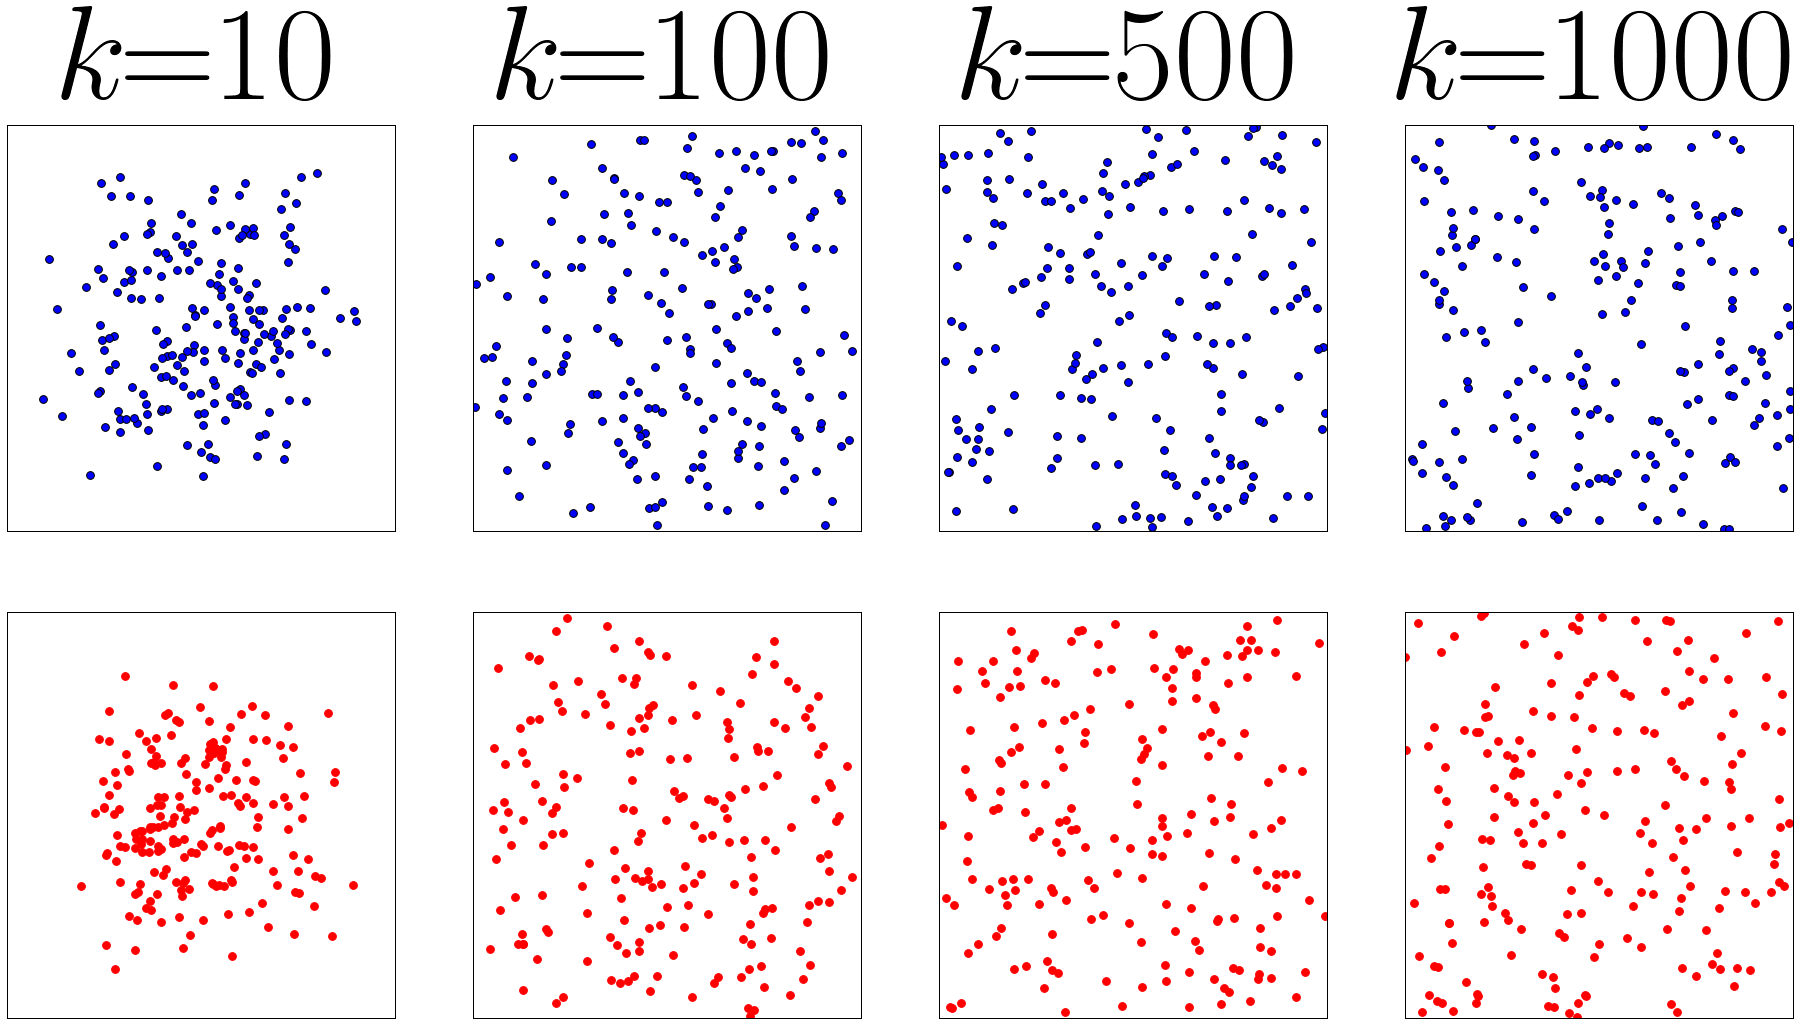

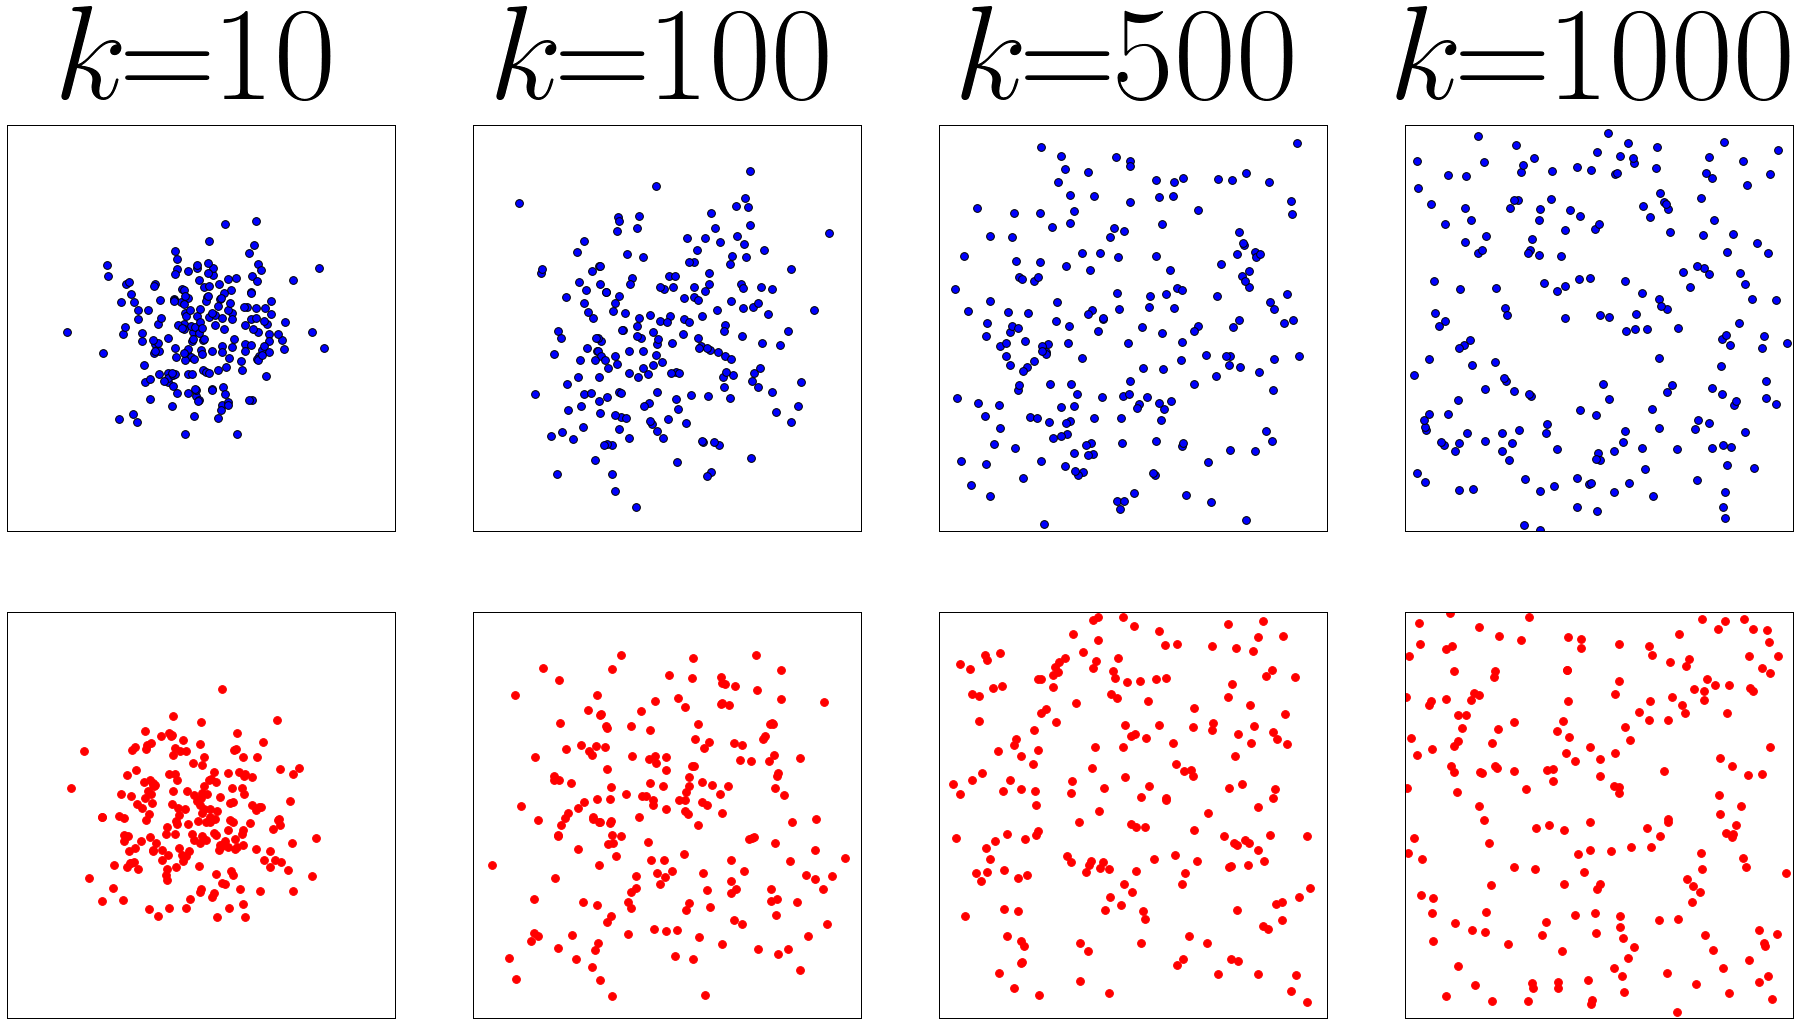

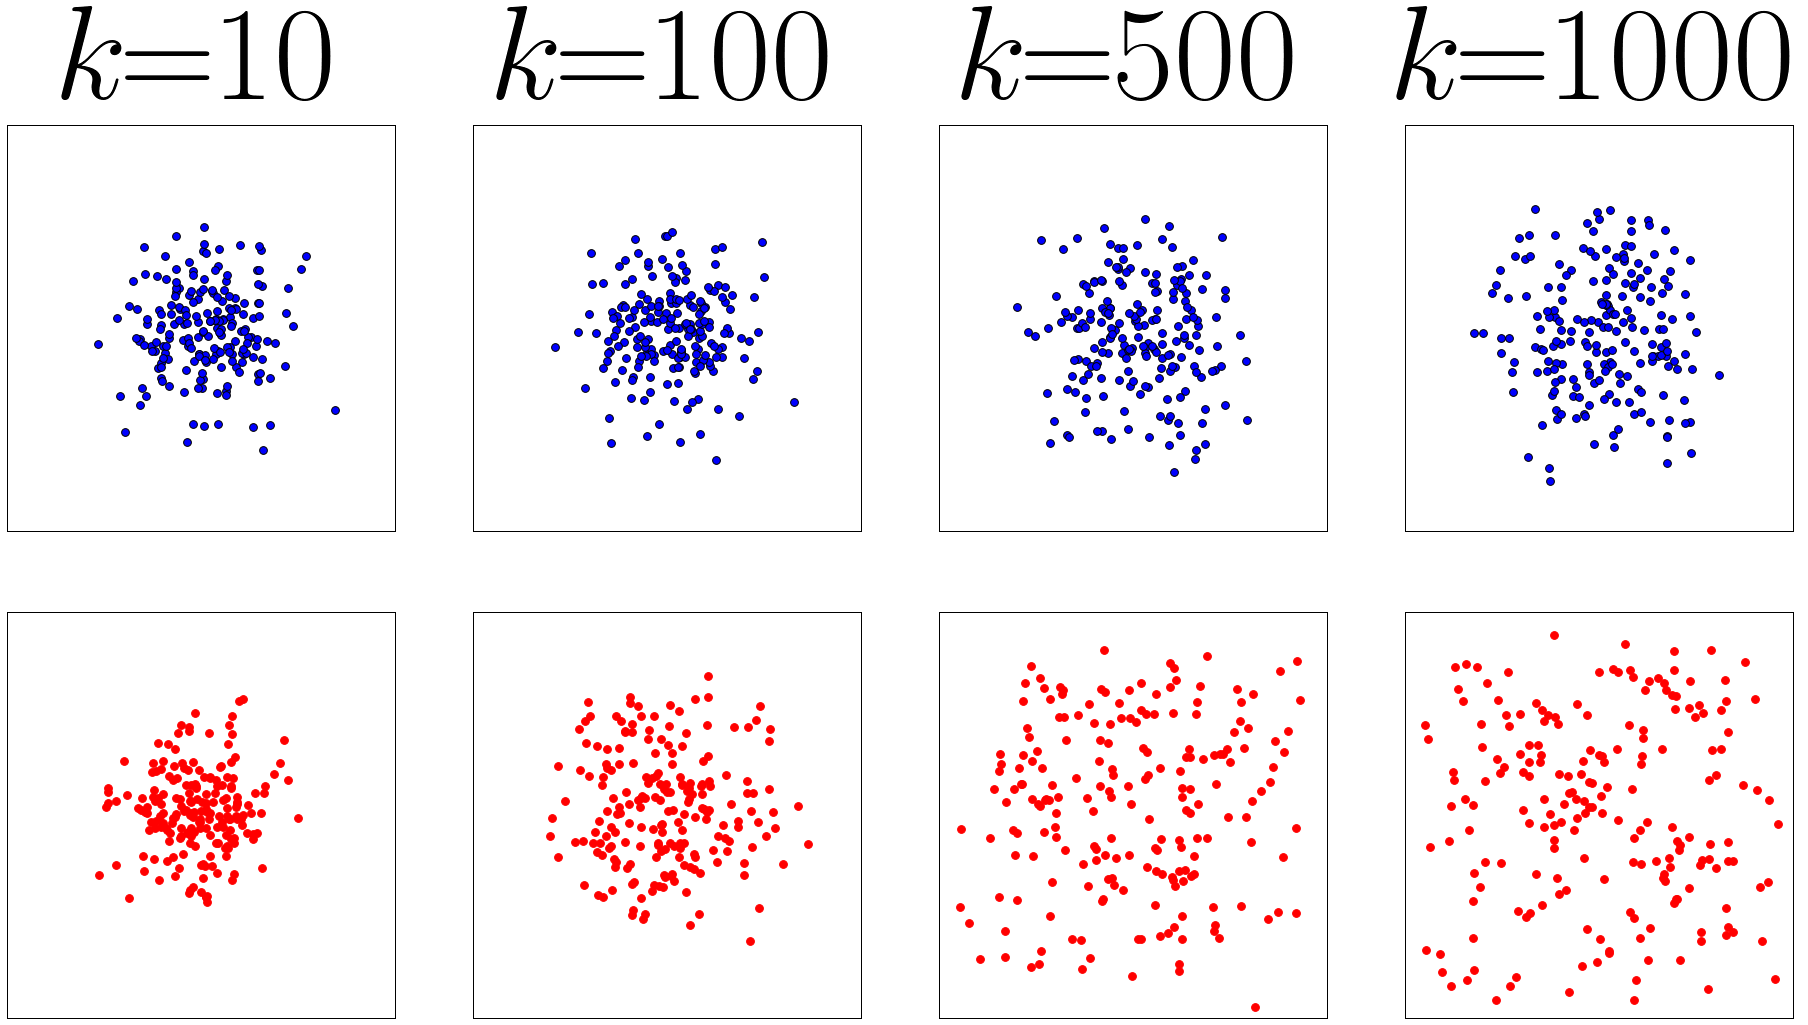

In [11]:
num_walks = 2

num_rows = num_walks
num_cols =  len(iter_plot) # iterations + uniform

for index, rep in enumerate(repetitions):
    fig = plt.figure(figsize = [num_cols*8, num_rows*8])
    for j, i in enumerate(iter_plot):
        x = dikin_rvs_p[index, 1, 0:NUM_PLOT, i]
        y = dikin_rvs_p[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, j+1)
        ax.scatter(x, y, s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])
        plt.title('$k\!\!=\!\!$ %d' % (i), fontsize=fs)
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        
        x = vaidya_rvs_p[index, 1, 0:NUM_PLOT, i]
        y = vaidya_rvs_p[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, num_cols + j+1)
        ax.scatter(x, y, color='r', s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])

    label = ('dikin_vaidya_cube_%d' % 2**(rep+2))
    if savfig:
        plt.savefig(path + label + '.pdf')
    plt.show()
    plt.close()



# Random Polytope

In [12]:
np.random.seed(7812371)
experiments = 200
iterations = 1001

# Defining the Polytope
d = 2
r = 0.5
As = []
bs = []

Ns = [64, 2048]
Nvals = len(Ns)
dikin_rvs_r = np.zeros((Nvals, d, experiments, iterations))
vaidya_rvs_r = np.zeros((Nvals, d, experiments, iterations))
for i, N in enumerate(Ns):
    print 'N = %d ' % N
    A, b = generate_A_and_b(N)
    As.append(A)
    bs.append(b)
    dikin_rvs_r[i,:, :, :] = main_run.run_dikin_walk(experiments, iterations, A, b, r)
    vaidya_rvs_r[i,:, :, :] = main_run.run_vaidya_walk(experiments, iterations, A, b, r)
    

N = 64 
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 20, Time Taken: 0.19
Experiment Number: 40, Time Taken: 0.17
Experiment Number: 60, Time Taken: 0.17
Experiment Number: 80, Time Taken: 0.18
Experiment Number: 100, Time Taken: 0.17
Experiment Number: 120, Time Taken: 0.17
Experiment Number: 140, Time Taken: 0.25
Experiment Number: 160, Time Taken: 0.19
Experiment Number: 180, Time Taken: 0.17
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 20, Time Taken: 0.31
Experiment Number: 40, Time Taken: 0.36
Experiment Number: 60, Time Taken: 0.32
Experiment Number: 80, Time Taken: 0.32
Experiment Number: 100, Time Taken: 0.36
Experiment Number: 120, Time Taken: 0.34
Experiment Number: 140, Time Taken: 0.30
Experiment Number: 160, Time Taken: 0.38
Experiment Number: 180, Time Taken: 0.37
N = 2048 
Experiment Number: 0, Time Taken: 0.06
Experiment Number: 20, Time Taken: 0.80
Experiment Number: 40, Time Taken: 0.84
Experiment Number: 60, Time Taken: 0.95
Experiment Numb

In [13]:
NUM_PLOT = 200
iter_plot = np.array([0, 10, 100, 500, 1000])

num_walks = 2
num_rows = num_walks*Nvals # one for dikin, vaidya uniform

num_rows = num_walks
num_cols =  len(iter_plot) # iterations + NO uniform

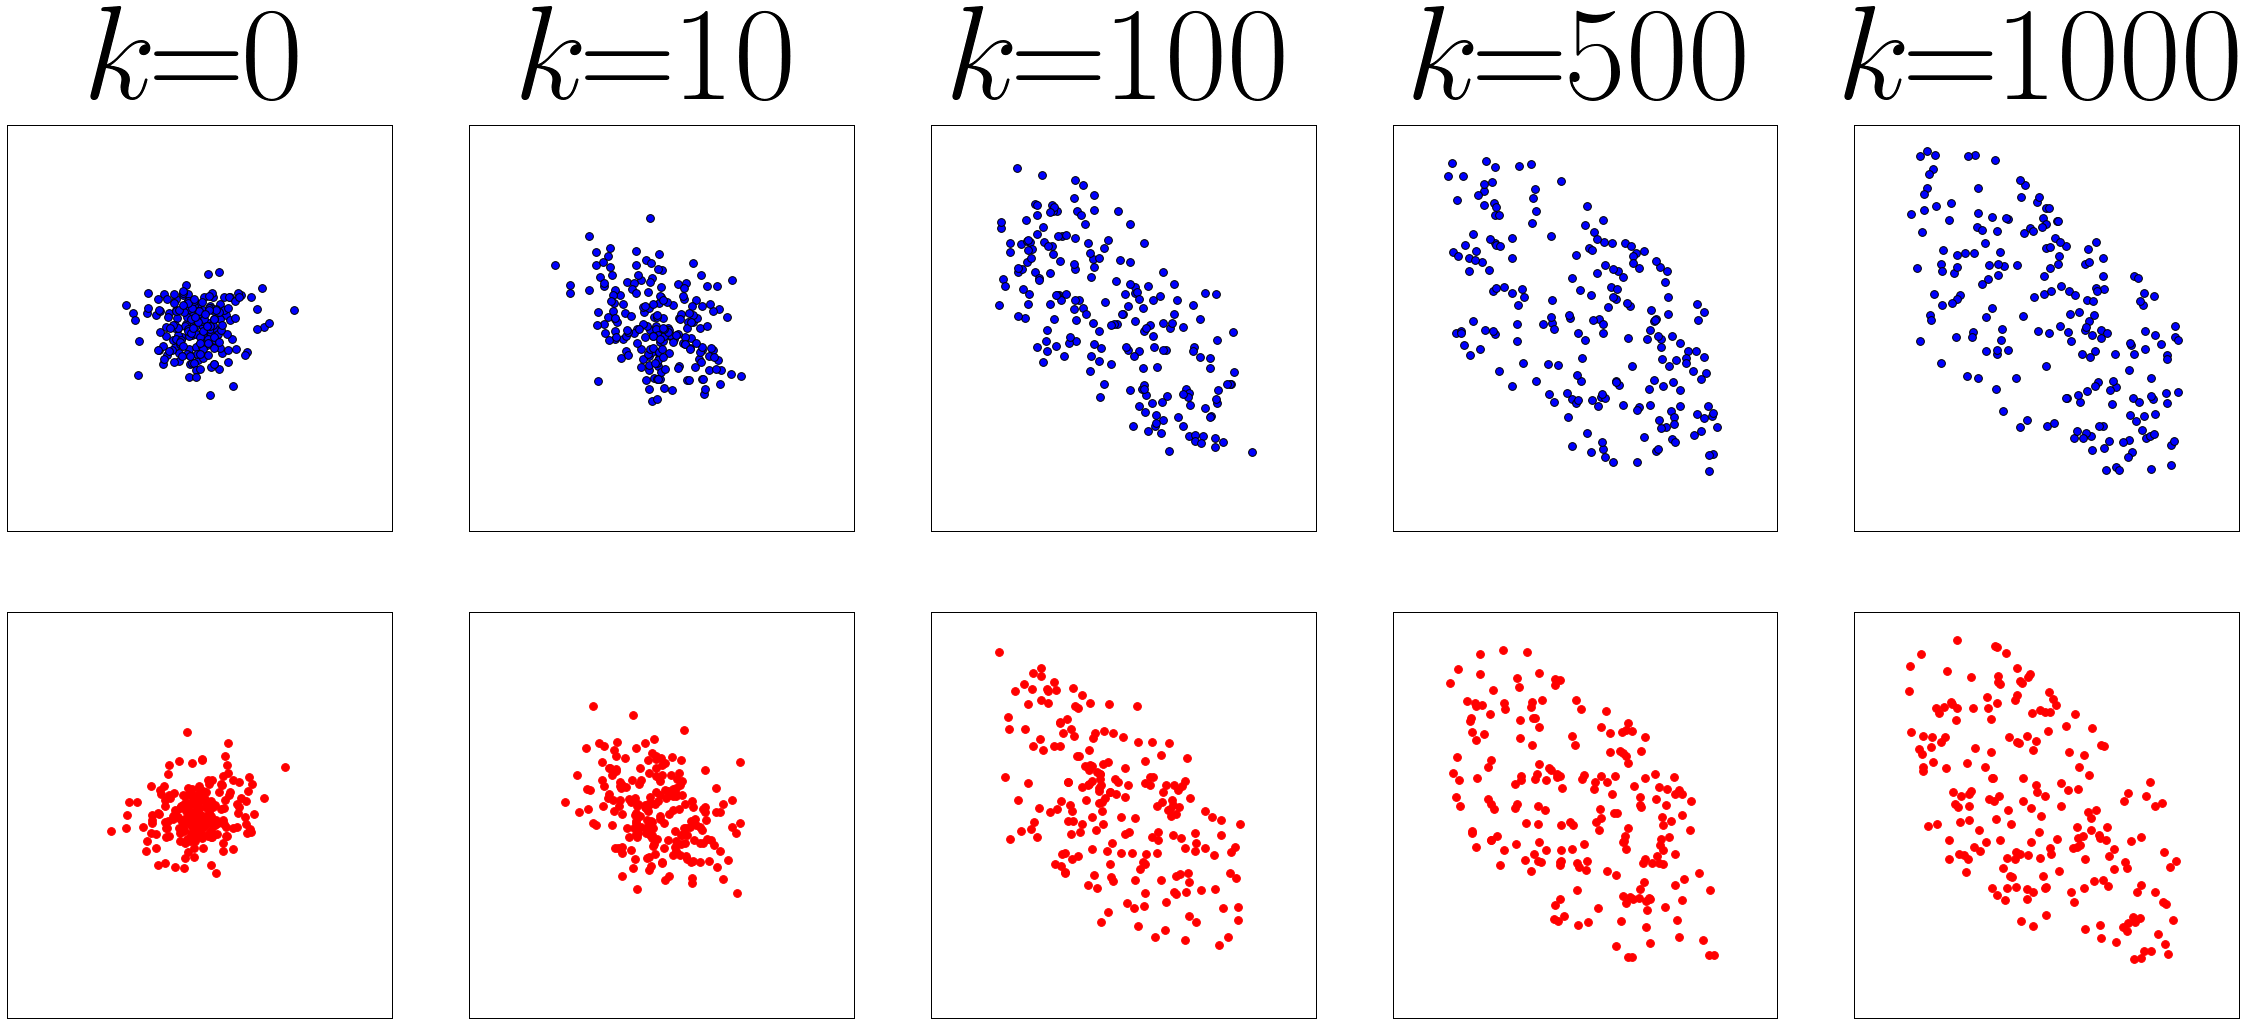

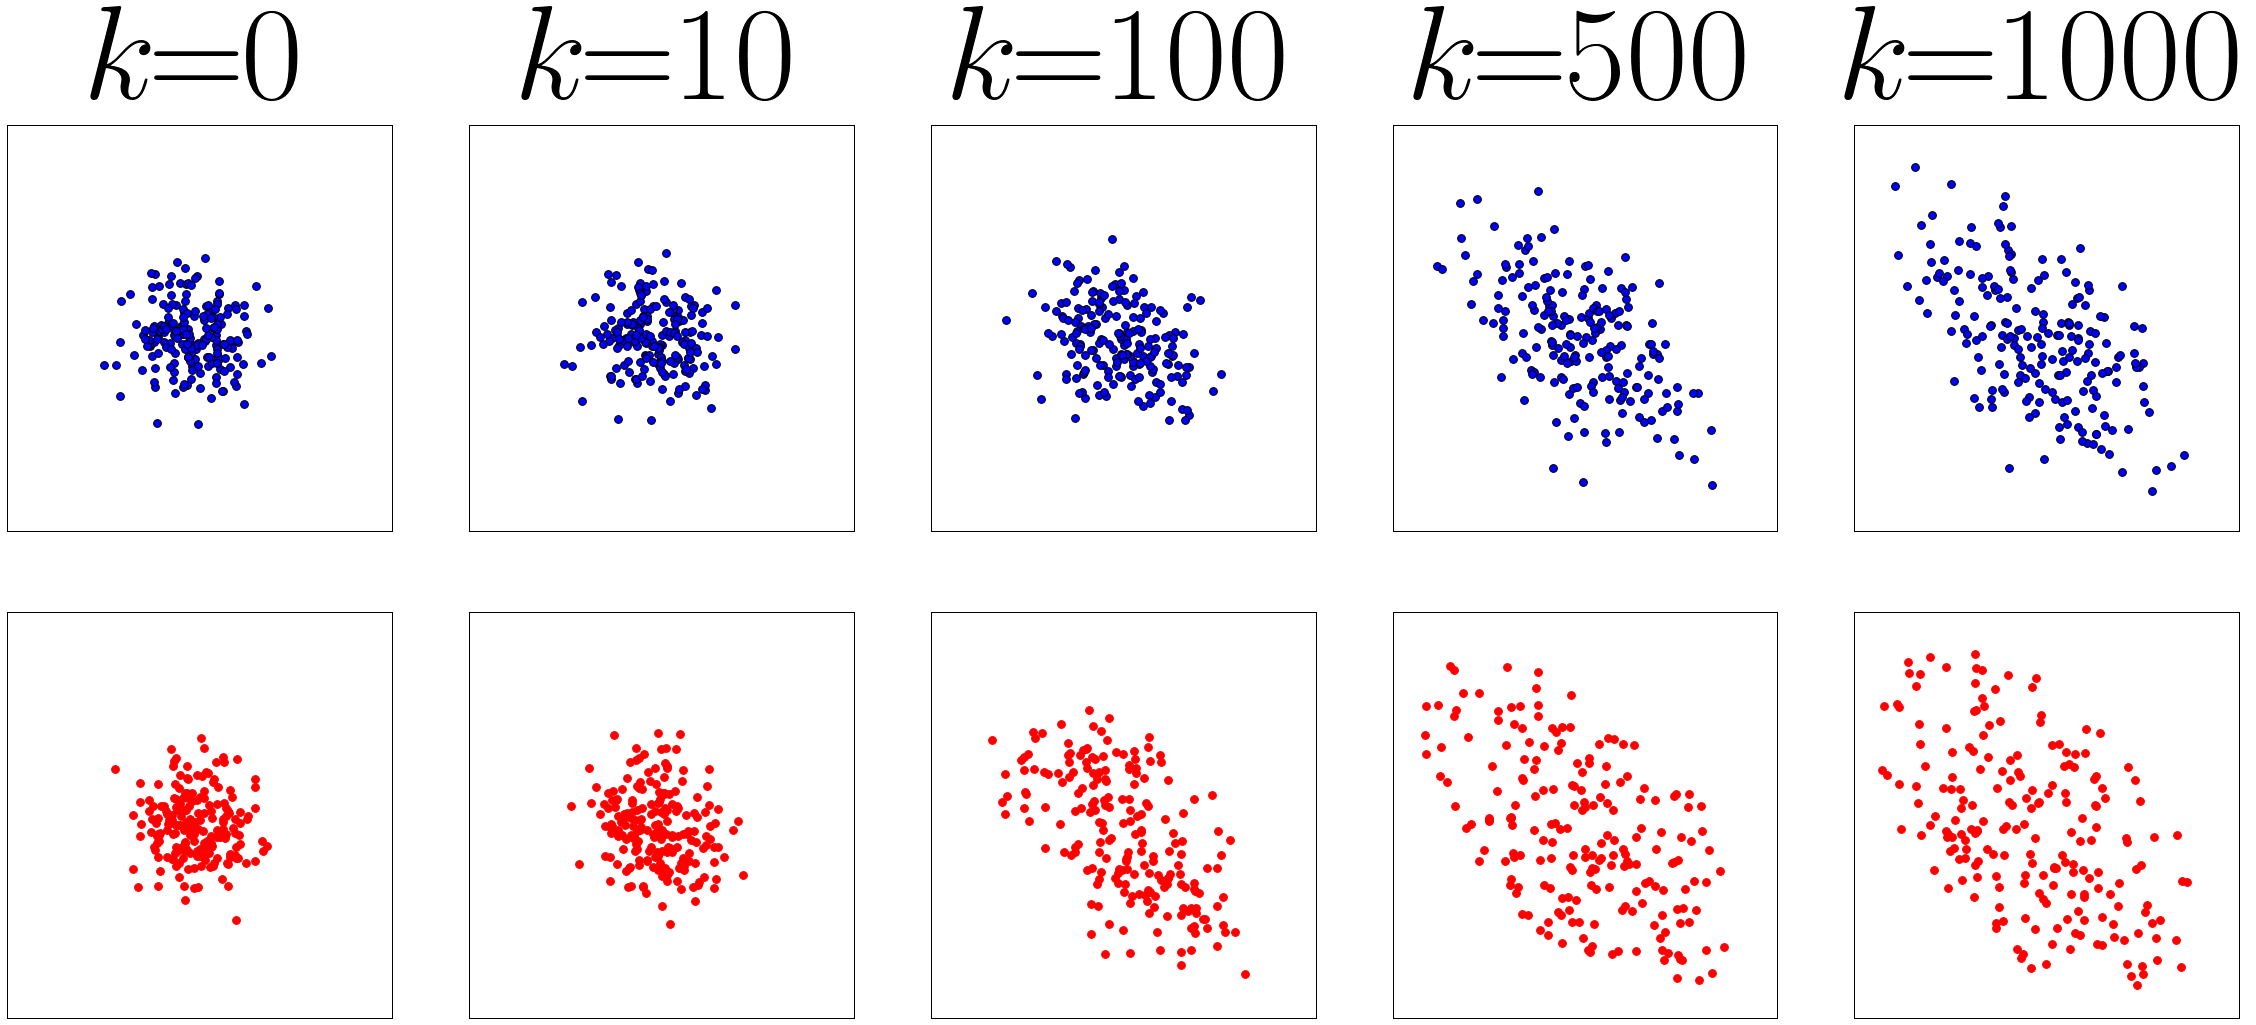

In [20]:
for index, rep in enumerate(Ns):
    fig = plt.figure(figsize = [num_cols*8, num_rows*8])
    for j, i in enumerate(iter_plot):
        if index == 0:
            xxlim = [-1.5, 1.5]
            yylim = [-1.7, 1.7]
        if index == 1:
            xxlim = [-1.2, 1.3]
            yylim = [-1.2, 1.3]
        A = As[index]
        b = bs[index]
        x = dikin_rvs_r[index, 0, 0:NUM_PLOT, i]
        y = dikin_rvs_r[index, 1, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, j+1)
        ax.scatter(x, y, s=s)
        axes = plt.gca()
        axes.set_xlim(xxlim)
        axes.set_ylim(yylim)
        axes.set_xticks([])
        axes.set_yticks([])
        plt.title('$k\!\!=\!\!$ %d' % (i), fontsize=fs)
        ttl = ax.title
        ttl.set_position([.5, 1.05])

        
        x = vaidya_rvs_r[index, 0, 0:NUM_PLOT, i]
        y = vaidya_rvs_r[index, 1, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, num_cols + j+1)
        ax.scatter(x, y, color='r', s=s)
        axes = plt.gca()
        axes.set_xlim(xxlim)
        axes.set_ylim(yylim)
        axes.set_xticks([])
        axes.set_yticks([])

    label = ('dikin_vaidya_random_%d' % rep)
    if savfig:
        plt.savefig(path + label + '.pdf')
    plt.show()
    plt.close()



# M-gons on Unit Circle

In [21]:
np.random.seed(695829)
experiments = 1000
iterations = 1001

# Defining the Polytope
d = 2
r = 0.5
As = []
bs = []

Ns = [64, 2048]
Nvals = len(Ns)
dikin_rvs_c = np.zeros((Nvals, d, experiments, iterations))
vaidya_rvs_c = np.zeros((Nvals, d, experiments, iterations))
john_rvs_c = np.zeros((Nvals, d, experiments, iterations))
for i, N in enumerate(Ns):
    print 'N = %d ' % N
    A, b = generate_A_and_b(N)
    As.append(A)
    bs.append(b)
    dikin_rvs_c[i,:, :, :] = main_run.run_dikin_walk(experiments, iterations, A, b, r)
    vaidya_rvs_c[i,:, :, :] = main_run.run_vaidya_walk(experiments, iterations, A, b, r)
    

N = 64 
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 100, Time Taken: 0.79
Experiment Number: 200, Time Taken: 0.74
Experiment Number: 300, Time Taken: 0.77
Experiment Number: 400, Time Taken: 0.87
Experiment Number: 500, Time Taken: 0.83
Experiment Number: 600, Time Taken: 0.97
Experiment Number: 700, Time Taken: 0.81
Experiment Number: 800, Time Taken: 0.76
Experiment Number: 900, Time Taken: 0.81
Experiment Number: 0, Time Taken: 0.01
Experiment Number: 100, Time Taken: 1.36
Experiment Number: 200, Time Taken: 1.43
Experiment Number: 300, Time Taken: 1.46
Experiment Number: 400, Time Taken: 1.52
Experiment Number: 500, Time Taken: 1.53
Experiment Number: 600, Time Taken: 2.13
Experiment Number: 700, Time Taken: 1.53
Experiment Number: 800, Time Taken: 1.50
Experiment Number: 900, Time Taken: 1.53
N = 2048 
Experiment Number: 0, Time Taken: 0.05
Experiment Number: 100, Time Taken: 4.39
Experiment Number: 200, Time Taken: 4.64
Experiment Number: 300, Time Taken: 4.65
Expe

In [22]:
iter_plot = np.array([0, 10, 100, 500, 1000])
NUM_PLOT = 200
num_walks = 2
num_rows = num_walks*Nvals # one for dikin, vaidya uniform

NameError: name 'xx' is not defined

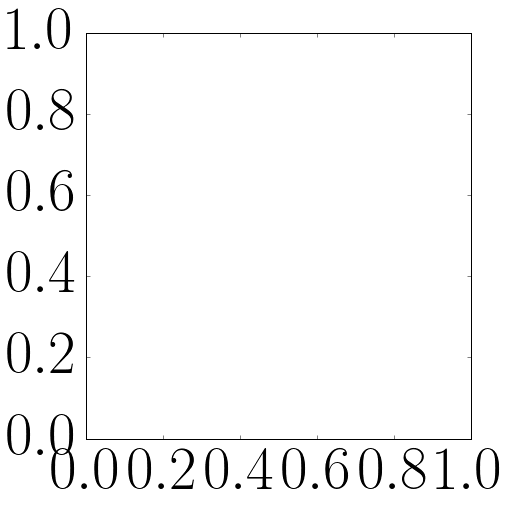

In [23]:
num_rows = num_walks
num_cols =  len(iter_plot) # iterations + NO uniform

for index, rep in enumerate(Ns):
    fig = plt.figure(figsize = [num_cols*8, num_rows*8])
    for j, i in enumerate(iter_plot):
        A = As[index]
        b = bs[index]
        x = dikin_rvs_c[index, 1, 0:NUM_PLOT, i]
        y = dikin_rvs_c[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, j+1)
        plot_A_b(A, b, xx, xlims, ylims)
        ax.scatter(x, y, s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])
        plt.title('$k\!\!=\!\!$ %d' % (i), fontsize=fs)
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        
        x = vaidya_rvs_c[index, 1, 0:NUM_PLOT, i]
        y = vaidya_rvs_c[index, 0, 0:NUM_PLOT, i]
        ax = fig.add_subplot(num_rows, num_cols, num_cols + j+1)
        plot_A_b(A, b, xx, xlims, ylims)
        ax.scatter(x, y, color='r', s=s)
        axes = plt.gca()
        axes.set_xlim([-1.,1.])
        axes.set_ylim([-1.,1.])
        axes.set_xticks([])
        axes.set_yticks([])
    label = ('dikin_vaidya_circle_%d' % rep)
    if savfig:
        plt.savefig(path + label + '.pdf')
    plt.show()
    plt.close()

